# Aula 4 de Aprendizado de Máquina e Reconhecimento de Padrões

Prof. Dr. Rodrigo Colnago Contreras

contreras@unifesp.br



## Programa

- Introdução
- SVM com margem rígida
- SVM com margem suave
- SVM com kernel
- SVM para regressão
- Exercícios Resolvidos


# Introdução às *Support Vector Machines* (SVMs)

As *Support Vector Machines* (SVMs) são modelos amplamente utilizados em tarefas de classificação e regressão. Elas fazem parte da **Teoria do Aprendizado Estatístico**, formalizada por Vapnik e Chervonenkis, e são particularmente poderosas quando trabalhamos com conjuntos de dados de alta dimensão e fronteiras complexas.

A ideia central das SVMs é encontrar um **hiperplano ótimo de separação** entre exemplos de classes distintas, ou seja, aquele que **maximiza a margem** entre os exemplos de diferentes categorias. A margem é a distância entre o hiperplano e os pontos mais próximos de cada classe — os chamados **vetores de suporte**.

Nesta aula, começaremos com a intuição geométrica das SVMs e, em seguida, evoluiremos para a formulação matemática da **SVM com margens rígidas**.

Abaixo, visualizamos um exemplo didático onde temos duas classes linearmente separáveis. A linha tracejada preta representa um possível hiperplano de separação. As linhas verdes representam as margens — e nossa meta será encontrar o hiperplano que as **maximiza**.


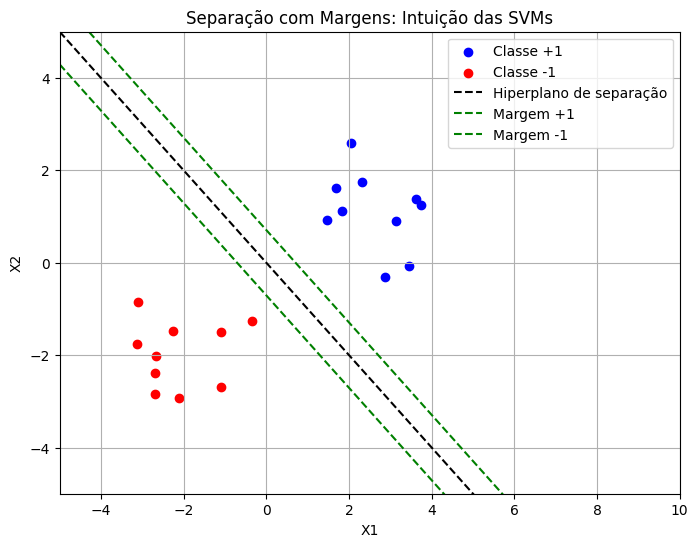

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Gerar dados simulados para duas classes linearmente separáveis
np.random.seed(1)
X_class1 = np.random.randn(10, 2) + [2, 2]
X_class2 = np.random.randn(10, 2) + [-2, -2]
X = np.vstack((X_class1, X_class2))
y = np.hstack((np.ones(10), -1*np.ones(10)))

# Definir vetor w e b para uma "reta separadora" simulada
w = np.array([1, 1])
b = 0

# Função para plotar o gráfico
def plot_svm_margin(X, y, w, b):
    plt.figure(figsize=(8, 6))
    plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', label='Classe +1')
    plt.scatter(X[y == -1][:, 0], X[y == -1][:, 1], color='red', label='Classe -1')

    # Criar linha de separação e margens
    x_vals = np.linspace(-5, 10, 100)
    y_vals = -(w[0] * x_vals + b) / w[1]
    margin = 1 / np.linalg.norm(w)
    y_vals_margin1 = y_vals + margin
    y_vals_margin2 = y_vals - margin

    plt.plot(x_vals, y_vals, 'k--', label='Hiperplano de separação')
    plt.plot(x_vals, y_vals_margin1, 'g--', label='Margem +1')
    plt.plot(x_vals, y_vals_margin2, 'g--', label='Margem -1')

    plt.title("Separação com Margens: Intuição das SVMs")
    plt.xlabel("X1")
    plt.ylabel("X2")
    plt.legend()
    plt.grid(True)
    plt.xlim(-5, 10)
    plt.ylim(-5, 5)
    plt.show()

plot_svm_margin(X, y, w, b)


# SVMs com Margens Rígidas

Vamos começar definindo o problema de **classificação binária supervisionada**.

Seja um conjunto de treinamento com $n$ exemplos, onde cada exemplo é composto por um vetor de atributos $\mathbf{x}_i =(x_{i,1},x_{i,2},...,x_{i,d}) \in \mathbb{R}^d$ e um rótulo associado $y_i \in \{-1, +1\}$:

$$
\mathcal{D} = \{ (\mathbf{x}_1, y_1), (\mathbf{x}_2, y_2), \dots, (\mathbf{x}_n, y_n) \}.
$$

Nosso objetivo é encontrar uma função $h(\mathbf{x})$ que separe corretamente os exemplos positivos dos negativos.

A SVM assume que os dados são **linearmente separáveis**, ou seja, existe um **hiperplano** definido por um vetor normal $\mathbf{w} = (w_1,w_2,...,w_d) \in \mathbb{R}^d$ e um escalar $b \in \mathbb{R}$ tal que:

$$
h(\mathbf{x}) = \mathbf{w}^\top \mathbf{x} + b,
$$

e que todos os pontos do conjunto de dados satisfaçam a condição:

$$
y_i (\mathbf{w}^\top \mathbf{x}_i + b) > 0 \quad \forall i = 1, \dots, n
$$



**Obs.:** Esse hiperplano pode ser utilizado para separar o espaço de entrada em dois conjuntos: aqueles formados pelos vetores $\mathbf{x}$ tais que $ h(\mathbf{x}) \geq 0$ e pelos que não satisfazem a última inequação. Em outras palavras, dado um vetor $\mathbf{x}$ qualquer, podemos estimar seu rótulo $\mathbf{y}$ pela função $\text{sinal}(\cdot)$ definida na sequência:


$$
\mathrm{sinal}(h(\mathbf{x})) =
\begin{cases}
+1, & \text{se } \mathbf{w}^\top \mathbf{x} + b \geq 0, \\
-1, & \text{se } \mathbf{w}^\top \mathbf{x} + b < 0. \\
\end{cases}
$$

## Exemplo: Classificação com $\mathrm{sign}(h(\mathbf{x}))$

Vamos ilustrar como a função $\mathrm{sign}(h(\mathbf{x}))$ atua na prática para classificar exemplos de duas classes linearmente separáveis.

Neste exemplo:

- Geramos duas nuvens de pontos em $\mathbb{R}^2$, uma de classe $+1$ (azul) e outra de classe $-1$ (vermelha);
- Utilizamos um hiperplano arbitrário $h(\mathbf{x}) = \mathbf{w}^\top \mathbf{x} + b$ com $\mathbf{w} = [1, 1]$ e $b = 0$;
- Classificamos os pontos com $\hat{y} = \mathrm{sign}(h(\mathbf{x}))$.




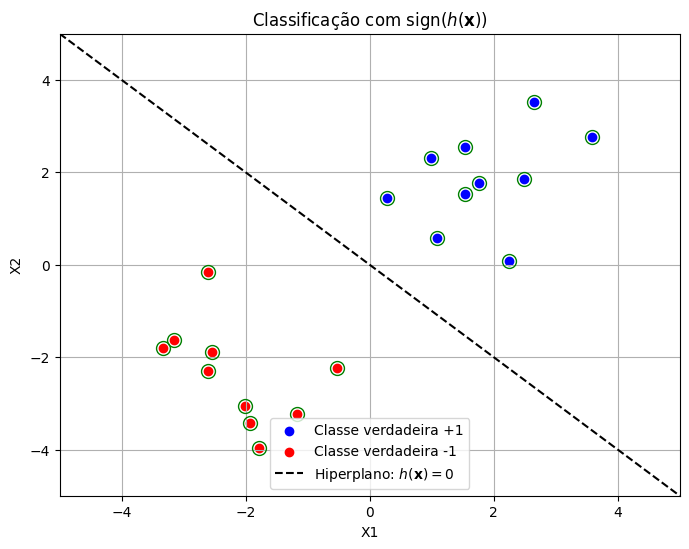

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Gerar dados de duas classes linearmente separáveis
np.random.seed(42)
X_pos = np.random.randn(10, 2) + [2, 2]
X_neg = np.random.randn(10, 2) + [-2, -2]
X = np.vstack((X_pos, X_neg))
y = np.hstack((np.ones(10), -1*np.ones(10)))

# Definir hiperplano w e b arbitrários (corretamente separando as classes)
w = np.array([1, 1])
b = 0

# Classificação usando sign(h(x))
def classify(X, w, b):
    h_x = np.dot(X, w) + b
    return np.sign(h_x)

y_pred = classify(X, w, b)

# Visualização
plt.figure(figsize=(8, 6))
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', label='Classe verdadeira +1')
plt.scatter(X[y == -1][:, 0], X[y == -1][:, 1], color='red', label='Classe verdadeira -1')

# Marcar classificações corretas/incorretas
for i in range(len(X)):
    if y[i] == y_pred[i]:
        plt.plot(X[i, 0], X[i, 1], 'go', markersize=10, fillstyle='none')  # correto
    else:
        plt.plot(X[i, 0], X[i, 1], 'kx', markersize=10)  # incorreto

# Desenhar o hiperplano
x_vals = np.linspace(-5, 5, 100)
y_vals = -(w[0] * x_vals + b) / w[1]
plt.plot(x_vals, y_vals, 'k--', label='Hiperplano: $h(\\mathbf{x})=0$')

plt.title("Classificação com $\mathrm{sign}(h(\\mathbf{x}))$")
plt.xlabel("X1")
plt.ylabel("X2")
plt.legend()
plt.grid(True)
plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.show()


## Infinitos Hiperplanos e o Hiperplano Canônico

Quando os dados são **linearmente separáveis**, existem **infinitos hiperplanos** que conseguem separar perfeitamente as duas classes. Isso porque a separação pode ser feita com diferentes inclinações e distâncias em relação aos pontos, ainda mantendo a separabilidade.

No entanto, **nem todos esses hiperplanos são igualmente bons**. Um hiperplano que passe muito próximo dos pontos de treinamento pode ter baixa capacidade de generalização. Por isso, buscamos o **hiperplano ótimo**, aquele que **maximiza a margem de separação** entre as classes.

Para formalizar essa busca, introduzimos o conceito de **hiperplano canônico**.

### Definição: Hiperplano Canônico

Chamamos de **hiperplano canônico** aquele para o qual os exemplos mais próximos entre si de cada classe, também conhecidos como ***vetores de suporte***, satisfazem:

$$
|h(\mathbf{x}_i)| = |\mathbf{w}^\top \mathbf{x}_i + b| = 1,
$$

ou, de forma equivalente:

$$
y_i(\mathbf{w}^\top \mathbf{x}_i + b) = 1.
$$

Esse valor fixado de 1 para o funcional de decisão dos vetores de suporte **define a escala da margem** e nos permite transformar o problema de separação ótima em um problema de **minimização convexa**.

É importante notar que **essa igualdade vale apenas para os vetores de suporte** — isto é, os pontos de treinamento que estão exatamente sobre as margens. Para os demais exemplos do conjunto de dados (aqueles mais distantes do hiperplano), temos:

$$
y_i(\mathbf{w}^\top \mathbf{x}_i + b) > 1.
$$

Portanto, o conjunto de restrições da SVM com margens rígidas é descrito pelas seguintes **inequações**:

$$
y_i(\mathbf{w}^\top \mathbf{x}_i + b) \geq 1 \quad \text{para todo } i = 1, \dots, n.
$$



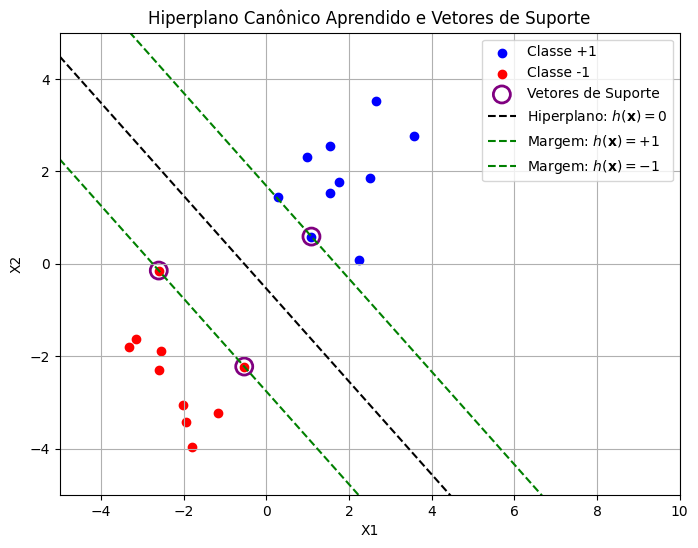

In [3]:
# Obter os coeficientes do hiperplano
w = np.array([0.45182465, 0.4494984 ])
b = 0.24209387304919786

# Identificar vetores de suporte
support_vectors = np.array([[-0.53435123, -2.2257763 ],
                          [-2.60170661, -0.14772182],
                          [ 1.09197592,  0.5876963 ]])

# Visualização
plt.figure(figsize=(8, 6))
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', label='Classe +1')
plt.scatter(X[y == -1][:, 0], X[y == -1][:, 1], color='red', label='Classe -1')

# Destacar vetores de suporte
plt.scatter(support_vectors[:, 0], support_vectors[:, 1],
            s=150, facecolors='none', edgecolors='purple', linewidths=2, label='Vetores de Suporte')

# Gerar pontos para o gráfico do hiperplano e margens
x_vals = np.linspace(-5, 10, 200)
y_vals = -(w[0] * x_vals + b) / w[1]
y_margin_plus = -(w[0] * x_vals + b - 1) / w[1]
y_margin_minus = -(w[0] * x_vals + b + 1) / w[1]

# Plotar hiperplano e margens canônicas
plt.plot(x_vals, y_vals, 'k--', label='Hiperplano: $h(\\mathbf{x})=0$')
plt.plot(x_vals, y_margin_plus, 'g--', label='Margem: $h(\\mathbf{x})=+1$')
plt.plot(x_vals, y_margin_minus, 'g--', label='Margem: $h(\\mathbf{x})=-1$')

plt.title("Hiperplano Canônico Aprendido e Vetores de Suporte")
plt.xlabel("X1")
plt.ylabel("X2")
plt.legend()
plt.grid(True)
plt.xlim(-5, 10)
plt.ylim(-5, 5)
plt.show()


## Qual é a distância entre os dois hiperplanos canônicos?

Seja $h(\mathbf{x}) = \mathbf{w}^\top \mathbf{x} + b$ o hiperplano de decisão.

A **distância de um ponto $\mathbf{x}$ ao hiperplano $h(\mathbf{x})=\mathbf{w}\mathbf{x}+b = 0$** é dada por:

$$
\text{distância}(\mathbf{x}, h) = \frac{|\mathbf{w}^\top \mathbf{x} + b|}{\|\mathbf{w}\|}.
$$

Como estamos trabalhando com o **hiperplano canônico**, sabemos que os vetores de suporte $\mathbf{x}_i$ (os pontos mais próximos do hiperplano de decisão) satisfazem:

$$
|h(\mathbf{x}_i)| = |\mathbf{w}^\top \mathbf{x}_i + b| = 1.
$$

Portanto, a distância de um vetor de suporte ao hiperplano é:

$$
\text{distância}(\mathbf{x}, h) = \frac{|\mathbf{w}^\top \mathbf{x} + b|}{\|\mathbf{w}\|} = \frac{|1|}{\|\mathbf{w}\|} = \frac{1}{\|\mathbf{w}\|}.
$$

Como temos **dois vetores de suporte**, um de cada classe (um em cada lado do hiperplano), e ambos estão a essa mesma distância do hiperplano, a **distância total** entre estes representantes de cada uma das duas classes é o dobro disso:

$$
\text{distância entre os hiperplanos canônicos} = \frac{1}{\|\mathbf{w}\|} + \frac{1}{\|\mathbf{w}\|} = \frac{2}{\|\mathbf{w}\|}.
$$

---

**Obs.:** Chamamos a distância entre os hiperplanos canônicos de ***margem***.

---

**Conclusão:** Observe que quanto maior a distância entre os hiperplanos $\dfrac{2}{\|\mathbf{w}\|}$ menor é o valor de **$\|\mathbf{w}\|$**. Então, maximizar a distância entre as classes pelo hiperplano linear é equivalente a minimizar a norma de seu vetor normal $\mathbf{w}$. Ou ainda, mais convenientemente, **minimizar $\dfrac{1}{2}\|\mathbf{w}\|^2$** para tornar o problema mais tratável numericamente.


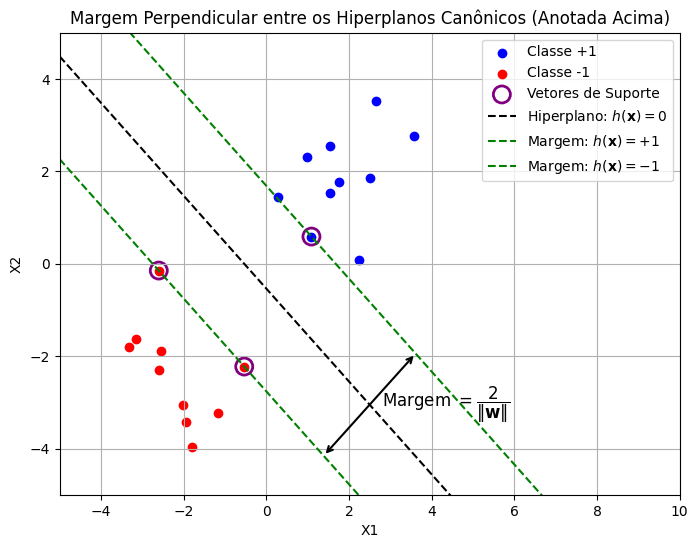

In [4]:
# Calcular vetor unitário perpendicular (direção da margem)
norm_w = np.linalg.norm(w)
u_w = w / norm_w

x0_shifted = np.array([2.5, -(w[0] * 2.5 + b) / w[1]])  # ponto sobre o hiperplano h(x)=0

# Calcular deslocamento perpendicular para as margens
p1 = x0_shifted + (1 / norm_w) * u_w
p2 = x0_shifted - (1 / norm_w) * u_w
mid_point = (p1 + p2) / 2

# Replotar
plt.figure(figsize=(8, 6))
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', label='Classe +1')
plt.scatter(X[y == -1][:, 0], X[y == -1][:, 1], color='red', label='Classe -1')
plt.scatter(support_vectors[:, 0], support_vectors[:, 1],
            s=150, facecolors='none', edgecolors='purple', linewidths=2, label='Vetores de Suporte')

# Hiperplanos
plt.plot(x_vals, y_vals, 'k--', label='Hiperplano: $h(\\mathbf{x})=0$')
plt.plot(x_vals, y_margin_plus, 'g--', label='Margem: $h(\\mathbf{x})=+1$')
plt.plot(x_vals, y_margin_minus, 'g--', label='Margem: $h(\\mathbf{x})=-1$')

# Desenhar seta da margem mais acima
plt.annotate('', xy=p1, xytext=p2,
             arrowprops=dict(arrowstyle='<->', color='black', lw=1.5))
plt.text(mid_point[0] + 0.3, mid_point[1],
         r'Margem $=\dfrac{2}{\|\mathbf{w}\|}$', fontsize=12, verticalalignment='center')

plt.title("Margem Perpendicular entre os Hiperplanos Canônicos (Anotada Acima)")
plt.xlabel("X1")
plt.ylabel("X2")
plt.legend()
plt.grid(True)
plt.xlim(-5, 10)
plt.ylim(-5, 5)
plt.show()


## Conclusão: Formulando o Problema de Otimização das SVMs

A partir da geometria observada, concluímos que:

- A **largura da margem** entre os hiperplanos canônicos é dada por $\dfrac{2}{\|\mathbf{w}\|}$;
- Para **maximizar a separação entre as classes**, precisamos **maximizar essa margem**;
- Isso é equivalente a **minimizar $\frac{1}{2}\|\mathbf{w}\|^2$**.

Além disso, para garantir que todos os exemplos estejam **fora ou sobre as margens**, impomos as **restrições canônicas**:

$$
y_i(\mathbf{w}^\top \mathbf{x}_i + b) \geq 1, \quad \text{para } i = 1, \dots, n.
$$

Com isso, podemos formular o problema de **otimização primal da SVM com margens rígidas** como:

$$
\begin{aligned}
\min_{\mathbf{w}, b} \quad & \frac{1}{2} \|\mathbf{w}\|^2, \\
\text{sujeito a} \quad & y_i(\mathbf{w}^\top \mathbf{x}_i + b) \geq 1, \quad \forall i=1,2,...,n.
\end{aligned}
$$

Este é um **problema de otimização convexa com restrições lineares**, e sua solução nos fornece o **hiperplano ótimo de separação** com **a maior margem possível entre as classes**.


## Como Resolver o Problema de Otimização na Prática?

O problema primal das SVMs com margens rígidas é um exemplo clássico de **programação convexa com restrições lineares**. Ele pode ser resolvido eficientemente por diversos **pacotes de otimização matemática** que implementam métodos como gradiente projetado, métodos de barreira ou algoritmos do tipo SMO.

A seguir, listamos algumas opções disponíveis em Python para resolver esse tipo de problema:

### 🛠️ Pacotes e Ferramentas:

- **`cvxpy`**: biblioteca de modelagem de otimização convexa extremamente flexível.
  ```python
  import cvxpy as cp
  w = cp.Variable(n)
  b = cp.Variable()
  objective = cp.Minimize(0.5 * cp.norm(w, 2)**2)
  constraints = [y[i] * (X[i] @ w + b) >= 1 for i in range(n)]
  problem = cp.Problem(objective, constraints)
  problem.solve()


In [5]:
import numpy as np
import cvxpy as cp

# Reutilizar X e y definidos anteriormente
n_samples, n_features = X.shape

# Variáveis de otimização
w = cp.Variable(n_features)
b = cp.Variable()

# Função objetivo
objective = cp.Minimize(0.5 * cp.norm(w, 2)**2)

# Restrições
constraints = [y[i] * (X[i] @ w + b) >= 1 for i in range(n_samples)]

# Problema de otimização
problem = cp.Problem(objective, constraints)
problem.solve()

# Solução
print("w ótimo:", w.value)
print("b ótimo:", b.value)
print("Margem: ", 2 / np.linalg.norm(w.value))


w ótimo: [0.4519453  0.44961841]
b ótimo: 0.24224753250404676
Margem:  3.137235511281764


# SVM com Margens Suaves (Soft Margin)

Na prática, nem sempre é possível encontrar um hiperplano que separe perfeitamente os dados. Isso pode ocorrer por:

- **Ruído** ou **outliers** no conjunto de treinamento;
- Dados que **não são linearmente separáveis**;
- Interesse em permitir certa **flexibilidade** na separação, para melhorar a generalização.

Para lidar com esses casos, introduzimos a **SVM com margens suaves**, que permite **violações controladas das margens** por meio de variáveis de folga $\xi_i \geq 0$ para cada exemplo.

### Modificação do problema de otimização

A ideia é permitir que alguns exemplos **violem a margem ou até mesmo o lado correto do hiperplano**, mas penalizando essas violações na função objetivo. O problema de otimização passa a ser:

$$
\begin{aligned}
\min_{\mathbf{w}, b, \boldsymbol{\xi}} \quad & \frac{1}{2} \|\mathbf{w}\|^2 + C \sum_{i=1}^n \xi_i \\
\text{sujeito a} \quad & y_i(\mathbf{w}^\top \mathbf{x}_i + b) \geq 1 - \xi_i, \quad \forall i = 1,2,...,n, \\
& \xi_i \geq 0, \quad \forall i = 1,2,...,n.
\end{aligned}
$$

- As **variáveis $\xi_i$** quantificam quanto o exemplo $i$ **viola a margem** (ou o lado certo do hiperplano);
- O parâmetro **$C > 0$** controla o *trade-off* entre **maximizar a margem** e **minimizar as violações**:
  - $C$ grande → penaliza fortemente violações → tende a se comportar como margem rígida;
  - $C$ pequeno → permite mais violações → margem mais suave.

Este modelo é conhecido como **SVM com margens suaves** ou **SVM de C-regularização**. Ele é mais robusto e amplamente utilizado em aplicações reais.


Vamos acrescentar um ponto que viola as margens ao nosso exemplo. No caso, o ponto $\mathbf{x} = (-2,-1)^T$.

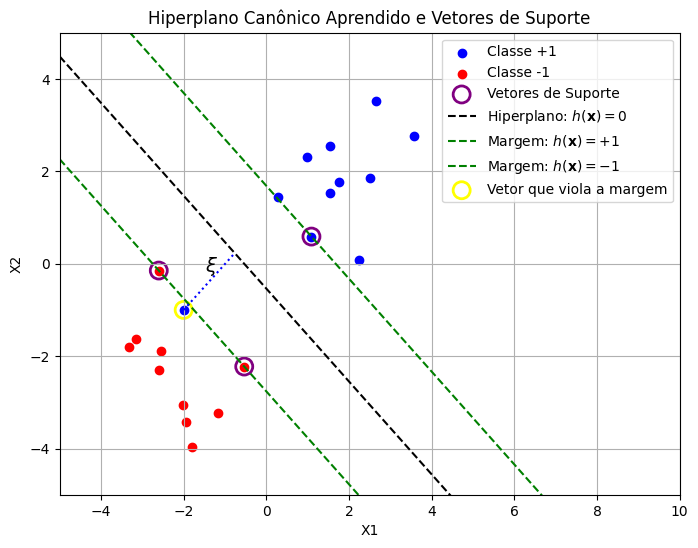

In [6]:
# Vetor que viola a margem
x_viola = np.array([-2,-1])

# Adicionar ponto de violação:
X = np.vstack((X,x_viola))
y = np.hstack((y,1))

# Obter os coeficientes do hiperplano
w = np.array([0.45182465, 0.4494984 ])
b = 0.24209387304919786

# Identificar vetores de suporte
support_vectors = np.array([[-0.53435123, -2.2257763 ],
                          [-2.60170661, -0.14772182],
                          [ 1.09197592,  0.5876963 ]])

# Visualização
plt.figure(figsize=(8, 6))
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', label='Classe +1')
plt.scatter(X[y == -1][:, 0], X[y == -1][:, 1], color='red', label='Classe -1')

# Destacar vetores de suporte
plt.scatter(support_vectors[:, 0], support_vectors[:, 1],
            s=150, facecolors='none', edgecolors='purple', linewidths=2, label='Vetores de Suporte')

# Gerar pontos para o gráfico do hiperplano e margens
x_vals = np.linspace(-5, 10, 200)
y_vals = -(w[0] * x_vals + b) / w[1]
y_margin_plus = -(w[0] * x_vals + b - 1) / w[1]
y_margin_minus = -(w[0] * x_vals + b + 1) / w[1]

# Plotar hiperplano e margens canônicas
plt.plot(x_vals, y_vals, 'k--', label='Hiperplano: $h(\\mathbf{x})=0$')
plt.plot(x_vals, y_margin_plus, 'g--', label='Margem: $h(\\mathbf{x})=+1$')
plt.plot(x_vals, y_margin_minus, 'g--', label='Margem: $h(\\mathbf{x})=-1$')


# Destacar vetor que viola a margem
plt.scatter(x_viola[0], x_viola[1],
            s=150, facecolors='none', edgecolors='yellow', linewidths=2, label='Vetor que viola a margem')

def projetar_no_hiperplano(x, w, b):
    return x - ((np.dot(w, x) + b) / np.dot(w, w)) * w

x_proj = projetar_no_hiperplano(x_viola, w, b)
plt.plot([x_viola[0], x_proj[0]], [x_viola[1], x_proj[1]], 'b:')

# Adicionar anotação da letra xi
plt.annotate(r'$\xi$', xy=((x_viola[0]-0.2 + x_proj[0]) / 2, (x_viola[1] - 0.2 + x_proj[1]) / 2 + 0.3),
             fontsize=14)

plt.title("Hiperplano Canônico Aprendido e Vetores de Suporte")
plt.xlabel("X1")
plt.ylabel("X2")
plt.legend()
plt.grid(True)
plt.xlim(-5, 10)
plt.ylim(-5, 5)
plt.show()


Vamos resolver esse problema analiticamente e visualizar a solução.

In [7]:
import numpy as np
import cvxpy as cp

# Dados de entrada (X: n x d, y: n)
# Suponha que você já tem X e y definidos
n, d = X.shape
C = 1.0  # parâmetro de regularização

# Variáveis de otimização
w = cp.Variable(d)
b = cp.Variable()
xi = cp.Variable(n)

# Função objetivo
objective = cp.Minimize(0.5 * cp.sum_squares(w) + C * cp.sum(xi))

# Restrições
constraints = [y[i] * (X[i] @ w + b) >= 1 - xi[i] for i in range(n)]
constraints += [xi >= 0]

# Resolver o problema
problem = cp.Problem(objective, constraints)
problem.solve()

# Resultados
print("w:", w.value)
print("b:", b.value)
print("Margem:", 2 / np.linalg.norm(w.value))


w: [0.4519453  0.44961841]
b: 0.24224753310917854
Margem: 3.137235513919606


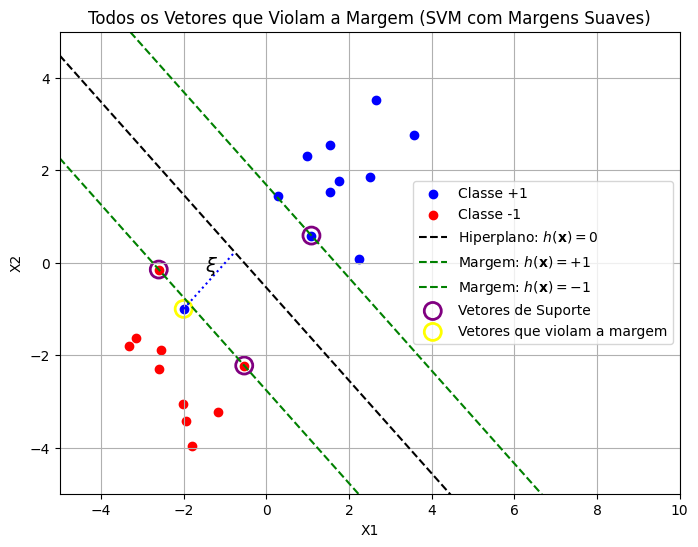

In [8]:
w = w.value
b = b.value

# Calcular h(x) = w^T x + b para todos os pontos
h_vals = X @ w + b

# Calcular margem y_i * h(x_i)
margins = y * h_vals

# Identificar todos os vetores que violam a margem (margem < 1)
violating_indices = np.where(margins < 1)[0]
violating_points = X[violating_indices]

# Replotar gráfico com todos os violadores destacados
plt.figure(figsize=(8, 6))
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', label='Classe +1')
plt.scatter(X[y == -1][:, 0], X[y == -1][:, 1], color='red', label='Classe -1')

# Hiperplanos
x_vals = np.linspace(-5, 10, 200)
y_vals = -(w[0] * x_vals + b) / w[1]
y_margin_plus = -(w[0] * x_vals + b - 1) / w[1]
y_margin_minus = -(w[0] * x_vals + b + 1) / w[1]
plt.plot(x_vals, y_vals, 'k--', label='Hiperplano: $h(\\mathbf{x})=0$')
plt.plot(x_vals, y_margin_plus, 'g--', label='Margem: $h(\\mathbf{x})=+1$')
plt.plot(x_vals, y_margin_minus, 'g--', label='Margem: $h(\\mathbf{x})=-1$')


# Destacar vetores de suporte
support_indices = np.where((margins > 0) & (margins <= 1 + 1e-5))[0]
support_vectors = X[support_indices]

plt.scatter(support_vectors[:, 0], support_vectors[:, 1],
            s=150, facecolors='none', edgecolors='purple', linewidths=2, label='Vetores de Suporte')


# Destacar todos os vetores que violam a margem
plt.scatter(violating_points[:, 0], violating_points[:, 1],
            s=150, facecolors='none', edgecolors='yellow', linewidths=2, label='Vetores que violam a margem')

def projetar_no_hiperplano(x, w, b):
    return x - ((np.dot(w, x) + b) / np.dot(w, w)) * w

for i in range(violating_points.shape[0]):
  x_proj = projetar_no_hiperplano([violating_points[i,0],violating_points[i,1]], w, b)
  plt.plot([violating_points[i,0], x_proj[0]], [violating_points[i,1], x_proj[1]], 'b:')

  # Adicionar anotação da letra xi
  plt.annotate(r'$\xi$', xy=((violating_points[i,0]-0.2 + x_proj[0]) / 2, (violating_points[i,1] - 0.2 + x_proj[1]) / 2 + 0.3),
              fontsize=14)


plt.title("Todos os Vetores que Violam a Margem (SVM com Margens Suaves)")
plt.xlabel("X1")
plt.ylabel("X2")
plt.legend()
plt.grid(True)
plt.xlim(-5, 10)
plt.ylim(-5, 5)
plt.show()


# SVMs com Kernels: Lidando com Fronteiras Não Lineares

Até agora, trabalhamos com **SVMs lineares**, que buscam um **hiperplano linear** capaz de separar as classes no espaço original dos dados. No entanto, em muitos problemas reais, os dados **não são linearmente separáveis** — ou seja, **não existe uma linha (ou plano) que separe perfeitamente as classes** no espaço original.

Para lidar com esses casos, introduzimos o conceito de **SVM com Kernels**.


A ideia é **projetar os dados para um espaço de maior dimensão**, chamado de **espaço de características**, onde a separação **se torne linear**. Esse mapeamento é feito por uma função $\phi(\mathbf{x})$:

$$
\phi: \mathbb{R}^n \rightarrow \mathbb{R}^m \quad (m > n)
$$




## Exemplo de Dados Não Linearmente Separáveis em $\mathbb{R}^2$

Neste exemplo, geramos dois conjuntos de pontos que representam duas classes:

- A **classe -1** está distribuída em um **círculo interno** (menor raio);
- A **classe +1** está distribuída em um **círculo externo** (maior raio).

Esses dados são **claramente não separáveis por uma reta** em $\mathbb{R}^2$. Qualquer tentativa de traçar uma linha de separação falharia, pois os dados das duas classes se sobrepõem de forma concêntrica.

Esse tipo de distribuição motiva o uso de **métodos de transformação do espaço**, como o **uso de kernels em SVMs**.



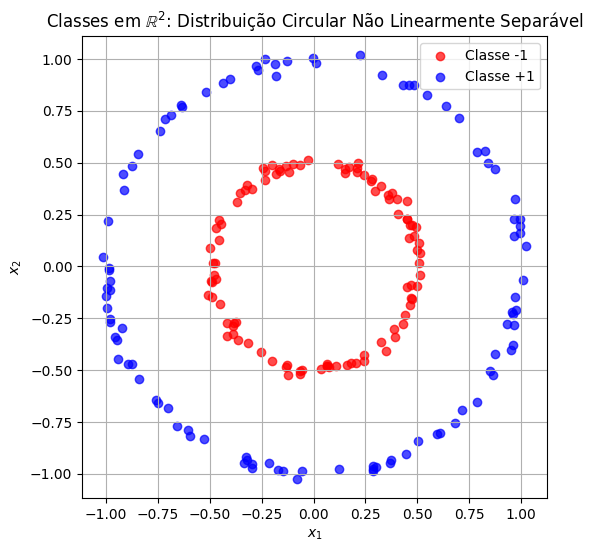

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# --------------------------
# Gerar dados de duas classes circulares
# --------------------------
np.random.seed(42)
n_points = 100

# Classe -1 (círculo interno)
theta_inner = 2 * np.pi * np.random.rand(n_points)
r_inner = 0.5 + 0.02 * np.random.randn(n_points)
x1_inner = r_inner * np.cos(theta_inner)
x2_inner = r_inner * np.sin(theta_inner)

# Classe +1 (círculo externo)
theta_outer = 2 * np.pi * np.random.rand(n_points)
r_outer = 1.0 + 0.02 * np.random.randn(n_points)
x1_outer = r_outer * np.cos(theta_outer)
x2_outer = r_outer * np.sin(theta_outer)

# --------------------------
# Parte 1: plotar em R²
# --------------------------
plt.figure(figsize=(6, 6))
plt.scatter(x1_inner, x2_inner, color='red', label='Classe -1', alpha=0.7)
plt.scatter(x1_outer, x2_outer, color='blue', label='Classe +1', alpha=0.7)

plt.title("Classes em $\\mathbb{R}^2$: Distribuição Circular Não Linearmente Separável")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.show()

## Transformação para $\mathbb{R}^3$ com $\phi(x_1, x_2)$

Aplicamos a seguinte transformação não linear aos dados:

$$
\phi(x_1, x_2) = \left(x_1^2,\ \sqrt{2}x_1x_2,\ x_2^2\right)
$$

Essa transformação leva os dados de $\mathbb{R}^2$ para $\mathbb{R}^3$, de forma que:

- Pontos da **classe -1** (círculo interno) permanecem agrupados próximos de uma região inferior do espaço;
- Pontos da **classe +1** (círculo externo) são projetados em uma região superior do espaço;
- As duas classes tornam-se **linearmente separáveis por um plano** nesse novo espaço tridimensional.

Este exemplo ilustra o poder do **"truque do kernel"**: ao invés de calcular $\phi$ explicitamente, usamos uma função de kernel que calcula o **produto escalar no espaço transformado**, possibilitando **SVMs não lineares** sem sair do espaço original de entrada.


In [10]:
import plotly.graph_objects as go

# Transformação phi
def phi(x1, x2):
    return x1**2, np.sqrt(2)*x1*x2, x2**2

phi_inner = phi(x1_inner, x2_inner)
phi_outer = phi(x1_outer, x2_outer)

# Criar figura interativa com Plotly
fig = go.Figure()

fig.add_trace(go.Scatter3d(
    x=phi_inner[0], y=phi_inner[1], z=phi_inner[2],
    mode='markers',
    marker=dict(size=5, color='red', opacity=0.7),
    name='Classe -1'
))

fig.add_trace(go.Scatter3d(
    x=phi_outer[0], y=phi_outer[1], z=phi_outer[2],
    mode='markers',
    marker=dict(size=5, color='blue', opacity=0.7),
    name='Classe +1'
))

fig.update_layout(
    title='Transformação φ(x₁, x₂) = (x₁², √2·x₁·x₂, x₂²)',
    scene=dict(
        xaxis_title='φ₁ = x₁²',
        yaxis_title='φ₂ = √2·x₁·x₂',
        zaxis_title='φ₃ = x₂²',
    ),
    legend=dict(x=0.02, y=0.98),
    margin=dict(l=0, r=0, b=0, t=30)
)

fig.show()


## Do Primal ao Dual: SVMs Não Lineares com Kernel

A ideia central das SVMs com kernel é **transformar o espaço original dos dados** com uma função não linear $\phi(\mathbf{x})$, de modo que os dados se tornem **linearmente separáveis em um novo espaço de características**.

### Problema Primal com Transformação Implícita

O problema de otimização primal para SVMs com margens suaves, considerando uma transformação não linear $\phi: \mathbb{R}^n \rightarrow \mathbb{R}^m$, é dado por:

$$
\begin{aligned}
\min_{\mathbf{w}, b, \boldsymbol{\xi}} \quad & \frac{1}{2} \|\mathbf{w}\|^2 + C \sum_{i=1}^n \xi_i \\
\text{sujeito a} \quad & y_i \left(\mathbf{w}^\top \phi(\mathbf{x}_i) + b\right) \geq 1 - \xi_i \\
& \xi_i \geq 0, \quad \forall i
\end{aligned}
$$

O problema aqui é que, **em geral, não conhecemos explicitamente a transformação $\phi$**. Em muitos casos, $\phi(\mathbf{x})$ pode mapear para um espaço de **dimensão muito alta ou até infinita**, como acontece com o kernel RBF.

---

### O Truque do Kernel

A observação fundamental é que a transformação $\phi$ aparece **apenas em produtos escalares** do tipo $\phi(\mathbf{x}_i)^\top \phi(\mathbf{x}_j)$. Assim, ao invés de trabalhar com $\phi$ diretamente, definimos uma **função de kernel** $K$ que calcula esse produto de forma eficiente:

$$
K(\mathbf{x}_i, \mathbf{x}_j) = \phi(\mathbf{x}_i)^\top \phi(\mathbf{x}_j)
$$

---

### Formulação Dual: O Caminho Viável

Com isso, reescrevemos o problema como uma **otimização dual** em termos das variáveis $\alpha_i$:

$$
\begin{aligned}
\max_{\boldsymbol{\alpha}} \quad & \sum_{i=1}^n \alpha_i - \frac{1}{2} \sum_{i,j=1}^n \alpha_i \alpha_j y_i y_j K(\mathbf{x}_i, \mathbf{x}_j) \\
\text{sujeito a} \quad & 0 \leq \alpha_i \leq C \\
& \sum_{i=1}^n \alpha_i y_i = 0
\end{aligned}
$$

Este problema dual pode ser resolvido de forma eficiente, e evita a necessidade de conhecer ou computar $\phi$ explicitamente.

---

## O Classificador no Espaço Dual: Função $g(\mathbf{x})$

Ao resolvermos a SVM via sua **formulação dual**, o vetor de pesos $\mathbf{w}$ **não é explicitamente calculado**. Em vez disso, obtemos os **multiplicadores de Lagrange** $\alpha_i$, que indicam a influência de cada exemplo de treinamento na construção da fronteira de decisão.

O classificador aprendido assume agora a forma de uma **função de decisão baseada em kernel**, definida como:

$$
g(\mathbf{x}) = \sum_{i \in \mathcal{S}} \alpha_i y_i K(\mathbf{x}_i, \mathbf{x}) + b
$$

onde:
- $\mathcal{S}$ é o conjunto de **vetores de suporte** ($\alpha_i > 0$),
- $K(\cdot, \cdot)$ é a **função de kernel** escolhida (por exemplo, RBF),
- $b$ é o **viés (bias)** calculado a partir dos vetores de suporte.

A decisão final é dada por:

$$
\hat{y} = \text{sinal}(g(\mathbf{x}))
$$

---


### Conclusão

Ao passar para o dual, conseguimos treinar SVMs **não lineares** com **grande eficiência computacional**, utilizando apenas funções de kernel. Essa abordagem permite construir **fronteiras de decisão complexas** sem sair do espaço original — a mágica do **kernel trick**.


> 📌 **Observação: Problemas Primal e Dual na Otimização Convexa**
>
> Em problemas de otimização convexa, como nas SVMs, é comum existirem duas formulações matematicamente equivalentes:
>
> - O **problema primal**, que expressa diretamente o objetivo original (por exemplo, minimizar $\|\mathbf{w}\|^2$);
> - O **problema dual**, que é derivado do primal usando **multiplicadores de Lagrange** e o **teorema da dualidade**.
>
> Ao construir a **função Lagrangiana** e aplicar condições de otimalidade (KKT), obtemos a versão dual. Em muitos casos, como nas SVMs com kernel, **resolver o dual é mais vantajoso**, porque ele depende apenas de **produtos escalares** e permite usar o **truque do kernel**.
>
> Ambos os problemas possuem a **mesma solução ótima para o valor da função objetivo** sob condições de regularidade (forte dualidade).
>
> 📚 Referência clássica:  
> **Boyd & Vandenberghe (2004). Convex Optimization.**  
> Capítulo 5 – Duality.

Conteúdo UFSCar (Pedro Munari): https://www.youtube.com/watch?v=u_vNrV14RXM&list=PLjK8TkmwOe0p8Iv4qfaGniaDRKRkgro_Q



### Exemplos de Kernels Comuns:

- **Linear**: $ K(\mathbf{x}, \mathbf{z}) = \mathbf{x}^\top \mathbf{z} $
- **Polinomial**: $ K(\mathbf{x}, \mathbf{z}) = (\mathbf{x}^\top \mathbf{z} + c)^d $
- **RBF (gaussiano)**: $ K(\mathbf{x}, \mathbf{z}) = \exp\left(-\gamma \|\mathbf{x} - \mathbf{z}\|^2\right) $
- **Sigmoide**: $ K(\mathbf{x}, \mathbf{z}) = \tanh(\alpha \mathbf{x}^\top \mathbf{z} + c) $

---

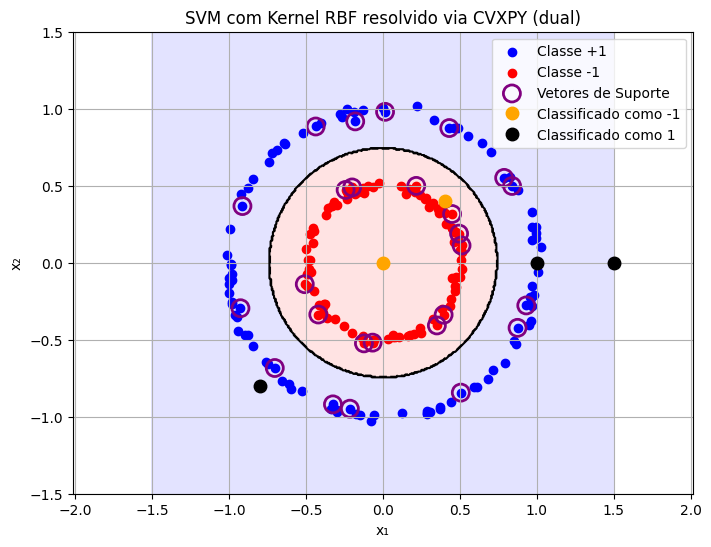

In [11]:
# Reexecutar o código completo agora incluindo todas as variáveis necessárias

import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
import cvxpy as cp

# Gerar dados
np.random.seed(42)
n_points = 100

# Classe -1 (círculo interno)
theta_inner = 2 * np.pi * np.random.rand(n_points)
r_inner = 0.5 + 0.02 * np.random.randn(n_points)
x1_inner = r_inner * np.cos(theta_inner)
x2_inner = r_inner * np.sin(theta_inner)

# Classe +1 (círculo externo)
theta_outer = 2 * np.pi * np.random.rand(n_points)
r_outer = 1.0 + 0.02 * np.random.randn(n_points)
x1_outer = r_outer * np.cos(theta_outer)
x2_outer = r_outer * np.sin(theta_outer)

# Dataset
X_rbf = np.vstack([
    np.column_stack((x1_inner, x2_inner)),
    np.column_stack((x1_outer, x2_outer))
])
y_rbf = np.array([-1]*n_points + [1]*n_points)

# Kernel RBF
def rbf_kernel(x, y, gamma=1.0):
    sq_dists = np.sum(x**2, axis=1).reshape(-1, 1) + np.sum(y**2, axis=1) - 2 * np.dot(x, y.T)
    return np.exp(-gamma * sq_dists)

# Parâmetro gamma
gamma = 1.0
K_rbf = rbf_kernel(X_rbf, X_rbf, gamma)

# Problema dual com cvxpy
n = X_rbf.shape[0]
Q = np.outer(y_rbf, y_rbf) * K_rbf
alpha = cp.Variable(n)
C = 1.0

objective = cp.Maximize(cp.sum(alpha) - 0.5 * cp.quad_form(alpha, cp.psd_wrap(Q)))
constraints = [
    alpha >= 0,
    alpha <= C,
    cp.sum(cp.multiply(alpha, y_rbf)) == 0
]

problem = cp.Problem(objective, constraints)
problem.solve()

# Recuperar alphas e vetores de suporte
alpha_val = alpha.value
support_indices = np.where(alpha_val > 1e-5)[0]
support_vectors = X_rbf[support_indices]
support_labels = y_rbf[support_indices]
support_alphas = alpha_val[support_indices]

# Calcular bias
def rbf_kernel_vector(x, Y, gamma):
    return np.exp(-gamma * np.sum((Y - x)**2, axis=1))

b_vals = support_labels - np.sum((support_alphas * support_labels)[:, None] * rbf_kernel(support_vectors, support_vectors, gamma), axis=0)
b_rbf = np.mean(b_vals)

# Classificador sinal
def classificador_rbf_manual(x):
    k_vals = rbf_kernel_vector(np.array(x), support_vectors, gamma)
    return np.sign(np.sum(support_alphas * support_labels * k_vals) + b_rbf)

# Pontos de teste
pontos_teste = np.array([
    [0.0, 0.0],
    [1.0, 0.0],
    [1.5, 0.0],
    [-0.8, -0.8],
    [0.4, 0.4]
])
resultados_cvx = [classificador_rbf_manual(p) for p in pontos_teste]

# Gerar grade para visualização
x_vals = np.linspace(-1.5, 1.5, 400)
y_vals = np.linspace(-1.5, 1.5, 400)
xx, yy = np.meshgrid(x_vals, y_vals)
Z = np.zeros_like(xx)

for i in range(xx.shape[0]):
    for j in range(xx.shape[1]):
        Z[i, j] = classificador_rbf_manual([xx[i, j], yy[i, j]])


# Plotar resultado
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, levels=[-np.inf, 0, np.inf], colors=['#FFBBBB', '#BBBBFF'], alpha=0.4)
plt.contour(xx, yy, Z, levels=[-1, 0, 1], colors='k', linestyles=['--', '-', '--'])

plt.scatter(X_rbf[y_rbf == 1][:, 0], X_rbf[y_rbf == 1][:, 1], color='blue', label='Classe +1')
plt.scatter(X_rbf[y_rbf == -1][:, 0], X_rbf[y_rbf == -1][:, 1], color='red', label='Classe -1')



plt.scatter(support_vectors[:, 0], support_vectors[:, 1],
            s=150, facecolors='none', edgecolors='purple', linewidths=2, label='Vetores de Suporte')


for i, p in enumerate(pontos_teste):
    cor = 'k' if resultados_cvx[i] == 1 else 'orange'
    plt.plot(p[0], p[1], 'o', color=cor, markersize=9, label=f'Classificado como {int(resultados_cvx[i])}' if i in [0,1] else "")

plt.title("SVM com Kernel RBF resolvido via CVXPY (dual)")
plt.xlabel("x₁")
plt.ylabel("x₂")
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.show()




# SVM para Regressão: Caso com Margem Rígida

Assim como a SVM de classificação busca um hiperplano que separa classes com máxima margem, a **SVM de regressão** (também conhecida como **SVR — Support Vector Regression**) busca uma **função preditiva linear** que se mantenha **dentro de uma faixa de tolerância $\epsilon$ em torno dos valores reais** da variável de saída.

---

###  Objetivo

Queremos encontrar uma função:

$$
f(\mathbf{x}) = \mathbf{w}^\top \mathbf{x} + b
$$

que aproxime os pares de treinamento $(\mathbf{x}_i, y_i)$ de forma que os **erros absolutos** fiquem **dentro de uma margem fixa $\epsilon$**, ou seja:

$$
|y_i - f(\mathbf{x}_i)| \leq \epsilon
$$

---

### Restrições no Caso de Margem Rígida

Essa condição de tolerância pode ser expressa como duas **restrições lineares** para cada ponto:

$$
\begin{cases}
y_i - (\mathbf{w}^\top \mathbf{x}_i + b) \leq \epsilon \\
(\mathbf{w}^\top \mathbf{x}_i + b) - y_i \leq \epsilon
\end{cases}
\quad \text{ou, de forma compacta:} \quad
|y_i - f(\mathbf{x}_i)| \leq \epsilon
$$

Isso define uma **faixa (tubo $\epsilon$)** dentro da qual o modelo não será penalizado — essa é a **zona de tolerância**.

---

### O que não muda:

- A função objetivo continua sendo a **minimização da norma do vetor de pesos** $\frac{1}{2}\|\mathbf{w}\|^2$, ou seja, buscamos uma solução **simples** e com boa **capacidade de generalização**.
- Ainda se trata de um **problema de otimização convexa** com restrições lineares.

Matematicamente,

$$
\begin{aligned}
\min_{\mathbf{w},b} \quad & \frac{1}{2} \|\mathbf{w}\|^2 \\
\text{sujeito a} \quad &|y_i - f(\mathbf{x}_i)| \leq \epsilon, \quad \forall i = 1,2,..,n.
\end{aligned}
$$


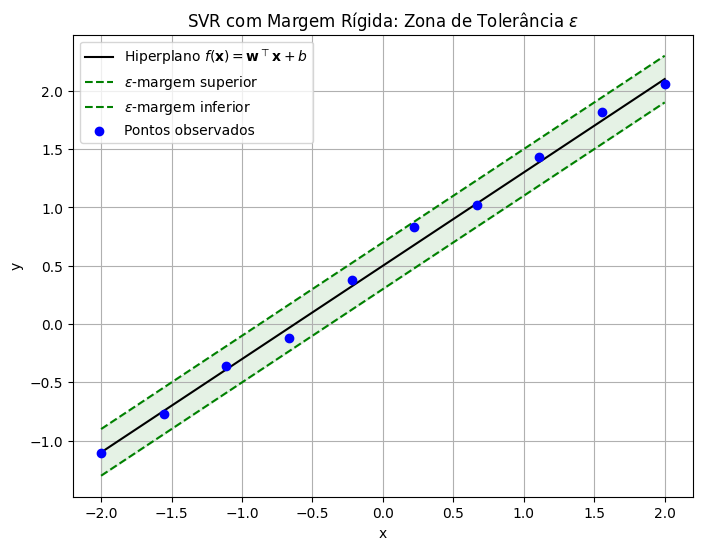

In [12]:
# Pontos de exemplo (x, y)
x_vals = np.linspace(-2, 2, 10)
y_true = 0.8 * x_vals + 0.5
y_obs = y_true + np.random.normal(0, 0.1, size=x_vals.shape)

# Hiperplano aprendido (reta de regressão)
def f(x):
    return 0.8 * x + 0.5

# Margem epsilon
epsilon = 0.2
upper_margin = f(x_vals) + epsilon
lower_margin = f(x_vals) - epsilon

# Plotar
plt.figure(figsize=(8, 6))
plt.plot(x_vals, f(x_vals), 'k-', label=r'Hiperplano $f(\mathbf{x}) = \mathbf{w}^\top \mathbf{x} + b$')
plt.plot(x_vals, upper_margin, 'g--', label=r'$\epsilon$-margem superior')
plt.plot(x_vals, lower_margin, 'g--', label=r'$\epsilon$-margem inferior')
plt.fill_between(x_vals, lower_margin, upper_margin, color='green', alpha=0.1)

plt.scatter(x_vals, y_obs, color='blue', label='Pontos observados', zorder=5)

plt.title("SVR com Margem Rígida: Zona de Tolerância $\epsilon$")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()


## SVR com Margens Suaves: Violando a Tolerância de $\epsilon$

Na prática, nem todos os pontos do conjunto de dados estarão perfeitamente dentro da faixa de tolerância $\epsilon$. Para lidar com isso, generalizamos a SVR para permitir **violações da margem**, introduzindo as chamadas **variáveis de folga** $\xi_i$ e $\xi_i^-$:

- $\xi_i$: quanto o valor real $y_i$ ultrapassa a **margem superior**.
- $\xi_i^-$: quanto o valor real $y_i$ ultrapassa a **margem inferior**.

Essas variáveis são **não negativas** e indicam o **quanto o modelo erra além da tolerância permitida**.

---

### Problema de Otimização com Margens Suaves

O problema de SVR com margens suaves é:

$$
\begin{aligned}
\min_{\mathbf{w}, b, \boldsymbol{\xi}, \boldsymbol{\xi}^-} \quad & \frac{1}{2} \|\mathbf{w}\|^2 + C \sum_{i=1}^n (\xi_i + \xi_i^*) \\
\text{sujeito a} \quad &
\begin{cases}
y_i - (\mathbf{w}^\top \mathbf{x}_i + b) \leq \epsilon + \xi_i \\
(\mathbf{w}^\top \mathbf{x}_i + b) - y_i \leq \epsilon + \xi_i^- \\
\xi_i, \xi_i^* \geq 0
\end{cases}
\quad \forall i
\end{aligned}
$$

---

### Interpretação

- O primeiro termo da função objetivo, $\frac{1}{2}\|\mathbf{w}\|^2$, continua promovendo **simplicidade do modelo**.
- O segundo termo penaliza os **exemplos que estão fora da faixa $\epsilon$**, controlado pelo parâmetro $C$:
  - **$C$ grande**: penaliza fortemente os erros → modelo mais fiel ao treino;
  - **$C$ pequeno**: permite mais erros → modelo mais suave e tolerante a ruído.

---

### Vantagem da SVR

Esse modelo permite que a SVM de regressão:
- Mantenha uma faixa de erro “aceitável” sem penalização;
- Controle de forma elegante o **trade-off entre erro e complexidade**;
- Utilize os princípios da **margem máxima**, mesmo em tarefas de predição contínua.

Na próxima etapa, vamos visualizar graficamente como essa violação da margem é interpretada e incluir o papel das variáveis $\xi$ e $\xi^-$.


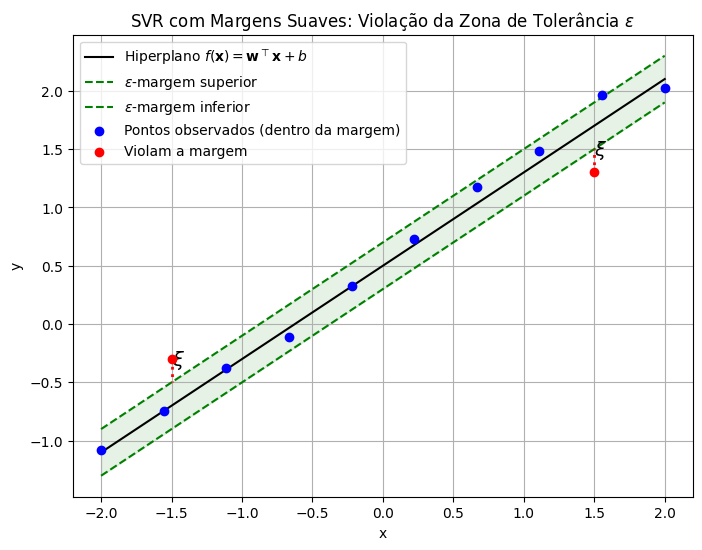

In [13]:
# Reutilizar os pontos anteriores e adicionar dois que violam a margem

# Dados de exemplo
x_vals = np.linspace(-2, 2, 10)
y_true = 0.8 * x_vals + 0.5
y_obs = y_true + np.random.normal(0, 0.1, size=x_vals.shape)

# Adicionar pontos que violam a margem
x_violadores = np.array([-1.5, 1.5])
y_violadores = np.array([f(-1.5) + 0.4, f(1.5) - 0.4])  # um acima, um abaixo da margem

# Margens
epsilon = 0.2
upper_margin = f(x_vals) + epsilon
lower_margin = f(x_vals) - epsilon

# Plotar
plt.figure(figsize=(8, 6))
plt.plot(x_vals, f(x_vals), 'k-', label=r'Hiperplano $f(\mathbf{x}) = \mathbf{w}^\top \mathbf{x} + b$')
plt.plot(x_vals, upper_margin, 'g--', label=r'$\epsilon$-margem superior')
plt.plot(x_vals, lower_margin, 'g--', label=r'$\epsilon$-margem inferior')
plt.fill_between(x_vals, lower_margin, upper_margin, color='green', alpha=0.1)

# Pontos dentro da margem
plt.scatter(x_vals, y_obs, color='blue', label='Pontos observados (dentro da margem)', zorder=5)

# Pontos que violam a margem
plt.scatter(x_violadores, y_violadores, color='red', label='Violam a margem', zorder=5)

# Desenhar as setas para representar ξ e ξ*
for i in range(len(x_violadores)):
    x_v = x_violadores[i]
    y_v = y_violadores[i]
    y_proj = f(x_v) + epsilon if y_v > f(x_v) + epsilon else f(x_v) - epsilon
    plt.annotate(r'$\xi$', xy=((x_v + x_v)/2, (y_v + y_proj)/2 + 0.05), fontsize=14)
    plt.plot([x_v, x_v], [y_v, y_proj], 'r:', linewidth=2)

plt.title("SVR com Margens Suaves: Violação da Zona de Tolerância $\epsilon$")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()


## SVR com Kernels: Generalizando para Relações Não Lineares

Assim como na classificação, a regressão com SVM também pode ser generalizada para **modelar relações não lineares** entre as variáveis. Para isso, utilizamos o mesmo princípio: aplicamos uma **transformação não linear $\phi(\mathbf{x})$** que leva os dados a um novo espaço onde a regressão se torne **linear**.

No entanto, em vez de calcular explicitamente $\phi(\mathbf{x})$, usamos uma **função de kernel** $K(\mathbf{x}_i, \mathbf{x}_j)$ que computa diretamente os produtos escalares no espaço transformado:

$$
K(\mathbf{x}_i, \mathbf{x}_j) = \phi(\mathbf{x}_i)^\top \phi(\mathbf{x}_j)
$$

---

###  Problema Dual da SVR com Kernel

Ao resolver o problema de SVR com margens suaves via **formulação dual**, obtemos um par de variáveis $\alpha_i$ e $\alpha_i^-$ para cada ponto de treinamento. A forma dual é:

$$
\begin{aligned}
\max_{\boldsymbol{\alpha}, \boldsymbol{\alpha}^-} \quad & -\frac{1}{2} \sum_{i=1}^n \sum_{j=1}^n (\alpha_i - \alpha_i^-)(\alpha_j - \alpha_j^-) K(\mathbf{x}_i, \mathbf{x}_j) \\
& + \epsilon \sum_{i=1}^n (\alpha_i + \alpha_i^-) - \sum_{i=1}^n y_i (\alpha_i - \alpha_i^-) \\
\text{sujeito a} \quad & 0 \leq \alpha_i, \alpha_i^- \leq C, \quad \sum_{i=1}^n (\alpha_i - \alpha_i^-) = 0
\end{aligned}
$$

---

###  O Classificador Final

Após resolver o problema dual, a função de predição é dada por:

$$
f(\mathbf{x}) = \sum_{i=1}^n (\alpha_i - \alpha_i^-) K(\mathbf{x}_i, \mathbf{x}) + b
$$

Note que:
- Apenas os **pontos com $\alpha_i > 0$ ou $\alpha_i^- > 0$** (os vetores de suporte) contribuem para a predição;
- O modelo pode construir **funções não lineares de regressão** sem nunca precisar representar explicitamente o espaço de alta dimensão $\phi(\mathbf{x})$;
- O viés $b$ é estimado a partir dos vetores de suporte localizados **dentro da margem** ($0 < \alpha_i < C$).

---

### Benefícios

- O uso de **kernels** permite adaptar o modelo a padrões complexos nos dados;
- A regressão é **controlada por margens e penalizações**, o que proporciona boa **capacidade de generalização**;
- A abordagem mantém o rigor geométrico da SVM, agora aplicado à predição de variáveis contínuas.


Correlação com os dados reais: 0.9814
MSE: 0.00647
RMSE: 0.08046
MAE: 0.06914


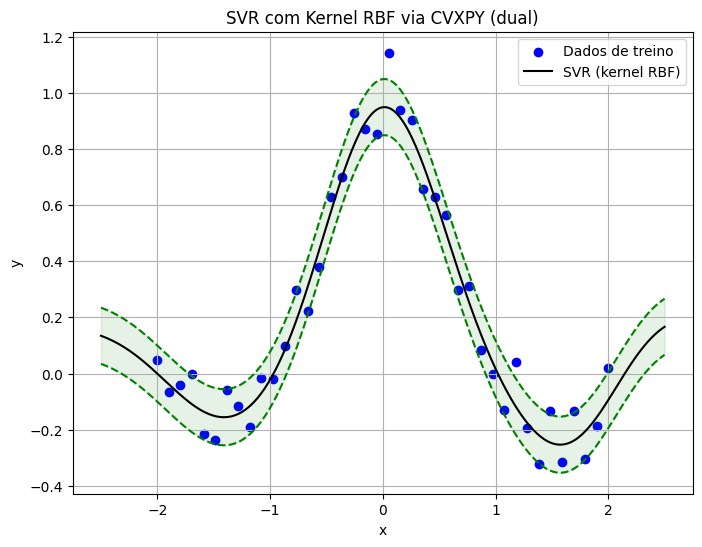

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import cvxpy as cp
from scipy.stats import pearsonr
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Dados de regressão
np.random.seed(42)
x_reg = np.linspace(-2, 2, 40).reshape(-1, 1)
y_reg = np.sinc(x_reg).ravel() + 0.1 * np.random.randn(*x_reg.shape).ravel()

# Kernel RBF
def rbf_kernel(X1, X2, gamma):
    sq_dists = np.sum(X1**2, axis=1).reshape(-1,1) + np.sum(X2**2, axis=1) - 2 * X1 @ X2.T
    return np.exp(-gamma * sq_dists)

# Parâmetros
n = x_reg.shape[0]
C = 1.0
epsilon = 0.1
gamma = 2.0
K = rbf_kernel(x_reg, x_reg, gamma)

# Problema dual
alpha = cp.Variable(n)
alpha_star = cp.Variable(n)
alpha_diff = alpha - alpha_star

objective = cp.Maximize(
    -0.5 * cp.quad_form(alpha_diff, cp.psd_wrap(K)) -
    epsilon * cp.sum(alpha + alpha_star) +
    cp.sum(cp.multiply(y_reg, alpha_diff))
)

constraints = [
    alpha >= 0,
    alpha <= C,
    alpha_star >= 0,
    alpha_star <= C,
    cp.sum(alpha_diff) == 0
]

problem = cp.Problem(objective, constraints)
problem.solve()

# Obter solução
alpha_val = alpha.value
alpha_star_val = alpha_star.value
alpha_diff_val = alpha_val - alpha_star_val

# Calcular b corretamente
inside_margin = (alpha_val > 1e-5) & (alpha_val < C - 1e-5)
inside_margin |= (alpha_star_val > 1e-5) & (alpha_star_val < C - 1e-5)
b_vals = []
for i in np.where(inside_margin)[0]:
    b_i = y_reg[i] - np.sum(alpha_diff_val * K[i, :])
    b_vals.append(b_i)
b_rbf = np.mean(b_vals)

# Preditor
def svr_predict(x):
    k = rbf_kernel(x_reg, x.reshape(1, -1), gamma).ravel()
    return np.sum(alpha_diff_val * k) + b_rbf

# Predição
x_test = np.linspace(-2.5, 2.5, 300).reshape(-1, 1)
y_pred = np.array([svr_predict(xi) for xi in x_test])

# Correlação com os dados de treino
y_train_pred = np.array([svr_predict(xi) for xi in x_reg])
correlacao, _ = pearsonr(y_train_pred, y_reg)
print(f"Correlação com os dados reais: {correlacao:.4f}")


# Calcular métricas
mse = mean_squared_error(y_reg, y_train_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_reg, y_train_pred)

print(f"MSE: {mse:.5f}")
print(f"RMSE: {rmse:.5f}")
print(f"MAE: {mae:.5f}")

# Visualização
plt.figure(figsize=(8, 6))
plt.scatter(x_reg, y_reg, color='blue', label='Dados de treino')
plt.plot(x_test, y_pred, 'k-', label='SVR (kernel RBF)')
plt.plot(x_test, y_pred + epsilon, 'g--')
plt.plot(x_test, y_pred - epsilon, 'g--')
plt.fill_between(x_test.ravel(), y_pred - epsilon, y_pred + epsilon, color='green', alpha=0.1)
plt.title("SVR com Kernel RBF via CVXPY (dual)")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()


---

# Exercícios Resolvidos

### Exercício 1: Sobreviventes do Titanic com SVM

Neste exercício, você irá utilizar a base de dados do Titanic para treinar e testar um classificador baseado em **Máquinas de Vetores de Suporte (SVM)**.

#### Etapas:

1. **Carregue os dados** da competição do Titanic (disponível em: https://www.kaggle.com/c/titanic/data).
   - Utilize apenas o arquivo `train.csv`.

2. **Reparta o dataset manualmente**:
   - Use as **primeiras 75% das linhas** como conjunto de **treinamento**;
   - Use as **últimas 25% das linhas** como conjunto de **teste**.

3. **Pré-processamento dos dados**:
   - Remova colunas não informativas (`PassengerId`, `Name`, `Ticket`, `Cabin`);
   - Converta variáveis categóricas em numéricas (ex: `Sex`, `Embarked`);
   - Preencha valores ausentes (`Age`, `Embarked`, etc.).

4. **Treine uma SVM**:
   - Use as funções discutidas em sala de aula;
   - Escolha um kernel (ex: `'linear'` ou `'rbf'`);
   - Treine o modelo sobre os dados de treino.

5. **Avalie o modelo**:
   - Aplique seu modelo ao conjunto de teste para estimar se um passageiro sobreviveu ou não;
   - Qual a porcentagem de acertos de seu modelo?

6. **Interpretação e Discussão**:
   - O desempenho foi satisfatório?
   - Qual kernel parece funcionar melhor?


In [16]:
# Upload do arquivo `train.csv` será necessário para resolver o exercício conforme solicitado

import pandas as pd

# Tentar carregar o arquivo se já estiver presente no ambiente
try:
    df = pd.read_csv("/content/train.csv")
    carregado = True
except FileNotFoundError:
    carregado = False

carregado


True

In [24]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Etapa 1: remover colunas irrelevantes
df_clean = df.drop(columns=["PassengerId", "Name", "Ticket", "Cabin"])

# Etapa 2: dividir em treino (75%) e teste (25%) manualmente
split_idx = int(0.75 * len(df_clean))
train_df = df_clean.iloc[:split_idx].copy()
test_df = df_clean.iloc[split_idx:].copy()

# Etapa 3: preprocessamento

# 3.1 preencher valores faltantes
for col in ["Age", "Embarked"]:
    if train_df[col].dtype == 'object':
        most_freq = train_df[col].mode()[0]
        train_df[col].fillna(most_freq, inplace=True)
        test_df[col].fillna(most_freq, inplace=True)
    else:
        mean_val = train_df[col].mean()
        train_df[col].fillna(mean_val, inplace=True)
        test_df[col].fillna(mean_val, inplace=True)

# 3.2 converter variáveis categóricas
train_df = pd.get_dummies(train_df, columns=["Sex", "Embarked"])
test_df = pd.get_dummies(test_df, columns=["Sex", "Embarked"])

# 3.3 alinhar colunas das duas bases
test_df = test_df.reindex(columns=train_df.columns, fill_value=0)

# Etapa 4: separar atributos e rótulo
X_train = train_df[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']].drop(columns=["Survived"]).values
y_train = train_df["Survived"].replace({0: -1, 1: 1}).values

X_test = test_df[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']].drop(columns=["Survived"]).values
y_test = test_df["Survived"].replace({0: -1, 1: 1}).values

X_train.shape, X_test.shape


<ipython-input-24-b271ac79aa26>:22: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



<ipython-input-24-b271ac79aa26>:23: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or d

((668, 5), (223, 5))

In [25]:
X_train

array([[ 3.        , 22.        ,  1.        ,  0.        ,  7.25      ],
       [ 1.        , 38.        ,  1.        ,  0.        , 71.2833    ],
       [ 3.        , 26.        ,  0.        ,  0.        ,  7.925     ],
       ...,
       [ 2.        , 32.        ,  2.        ,  0.        , 73.5       ],
       [ 2.        , 25.        ,  0.        ,  0.        , 13.        ],
       [ 3.        , 29.92376894,  0.        ,  0.        ,  7.775     ]])

In [29]:
import numpy as np
import cvxpy as cp

def rbf_kernel(X1, X2, gamma=1.0):
    """Kernel RBF robusto para matrizes"""
    X1 = np.atleast_2d(X1)
    X2 = np.atleast_2d(X2)
    sq_dists = np.sum(X1**2, axis=1).reshape(-1, 1) + np.sum(X2**2, axis=1) - 2 * X1 @ X2.T
    return np.exp(-gamma * sq_dists)

def treinar_svm_dual(X, y, C=1.0, kernel_fn=None):
    """Treina SVM dual com kernel arbitrário e CVXPY"""
    n = X.shape[0]
    y = y.astype(float)

    if kernel_fn is None:
        kernel_fn = rbf_kernel

    K = kernel_fn(X, X)
    alpha = cp.Variable(n)
    Q = np.outer(y, y) * K

    objective = cp.Maximize(cp.sum(alpha) - 0.5 * cp.quad_form(alpha, cp.psd_wrap(Q)))
    constraints = [alpha >= 0, alpha <= C, cp.sum(cp.multiply(alpha, y)) == 0]
    problem = cp.Problem(objective, constraints)
    problem.solve()

    alpha_val = alpha.value
    sv_idx = np.where(alpha_val > 1e-5)[0]
    X_sv = X[sv_idx]
    y_sv = y[sv_idx]
    alpha_sv = alpha_val[sv_idx]

    K_sv = kernel_fn(X_sv, X_sv)
    b_vals = y_sv - np.sum((alpha_sv * y_sv)[:, None] * K_sv, axis=0)
    b = np.mean(b_vals)

    def classificador(x):
        x = np.atleast_2d(x)
        k_vals = kernel_fn(X_sv, x).ravel()
        return np.sign(np.sum(alpha_sv * y_sv * k_vals) + b)

    return classificador, alpha_val, sv_idx, b

# Treinar o modelo com os dados do Titanic e avaliar a acurácia
classificador, alphas, sv_idx, bias = treinar_svm_dual(X_train, y_train, C=5, kernel_fn=rbf_kernel)
y_pred = np.array([classificador(x) for x in X_test])

from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)


0.6636771300448431

### Exercício 2: Predição do Próximo Valor do Bitcoin com SVR

Neste exercício, você deve utilizar dados históricos do Bitcoin para construir um **modelo de regressão com SVM (SVR)** que seja capaz de **prever o próximo valor de fechamento diário** com base nos valores anteriores.

#### Etapas:

1. **Obtenha os dados históricos do Bitcoin**:
   - Você pode usar a biblioteca `yfinance`:
     ```python
     import yfinance as yf
     btc = yf.download("BTC-USD", start="2021-01-01", end="2023-01-01")
     ```
   - Use apenas a coluna `Close` como série temporal.

2. **Crie os dados para treino**:
   - Use janelas simples do tipo:

     ```python
     # Exemplo 1: janela de 1 valor anterior
     X_t = [Close[t-1]]
     y_t = Close[t]
     ```

   - Ou, para uma janela de 3 dias:

     ```python
     # Exemplo 2: janela de 3 valores anteriores
     X_t = [Close[t-3], Close[t-2], Close[t-1]]
     y_t = Close[t]
     ```

3. **Escreva uma função chamada `treinar_e_predizer_svr(X, y)` que**:
   - Treina um modelo de SVR com kernel RBF;
   - Retorna uma predição para o próximo valor com base na última janela disponível.

4. **Avalie o modelo**:
   - Separe os dados em treino e teste (ex: utilize vetores de tamanho 50 do período sugerido para predizer a observação 51);
   - Calcule o erro médio absoluto (MAE) da predição nos dados de teste.

5. **(Opcional)**: Tente fazer predições multi-step (prevendo mais de um passo à frente recursivamente).

---



### Exercício 3: Classificação Multiclasse com SVM

Nos exercícios anteriores, trabalhamos com **classificadores binários** (duas classes apenas) utilizando Máquinas de Vetores de Suporte (SVM).

Agora, seu desafio é **generalizar essa abordagem para problemas com múltiplas classes**.

#### Objetivo:

Implemente uma função chamada `treinar_svm_multiclasse(X, y, C=1.0)` que:

- Treina um modelo SVM **multiclasse** a partir de um conjunto de dados com `k > 2` classes;
- Utiliza apenas um classificador binário como base (ex: como nos exercícios anteriores);
- Retorna um modelo preditivo capaz de classificar **novas amostras** em uma entre `k` classes.

---

#### Dicas:

- Utilize a estratégia **One-vs-Rest (OvR)**:
  - Para cada classe `i`, treine um classificador binário para distinguir “classe `i`” contra “todas as outras”;
  - Para prever uma nova amostra, aplique todos os classificadores e escolha aquele com **maior confiança** (ex: valor do hiperplano mais distante de zero).

---

#### Exemplo de uso esperado:

```python
modelo = treinar_svm_multiclasse(X_train, y_train)
y_pred = modelo(X_test)  # Retorna um vetor com rótulos de múltiplas classes


In [31]:
# Função para treinar classificadores SVM one-vs-rest com kernel arbitrário e CVXPY

def treinar_svm_multiclasse(X, y, C=1.0, kernel_fn=None):
    """
    Treina classificadores SVM binários usando a estratégia one-vs-rest para problemas multiclasse.

    Retorna uma função preditiva multiclasse.
    """
    classes = np.unique(y)
    classificadores = {}
    alphas_dict = {}
    biases_dict = {}
    sv_dict = {}

    for c in classes:
        # Criar rótulos binários para a classe atual (OvR)
        y_bin = np.where(y == c, 1, -1)
        classificador, alpha, sv_idx, bias = treinar_svm_dual(X, y_bin, C=C, kernel_fn=kernel_fn)
        classificadores[c] = classificador
        alphas_dict[c] = alpha
        biases_dict[c] = bias
        sv_dict[c] = sv_idx

    def preditor(X_input):
        X_input = np.atleast_2d(X_input)
        resultados = []
        for x in X_input:
            # Obter o valor bruto da função de decisão para cada classe
            pontuacoes = {c: np.sum(
                alpha[sv_idx] * np.where(y == c, 1, -1)[sv_idx] * kernel_fn(X[sv_idx], x.reshape(1, -1)).ravel()
            ) + biases_dict[c] for c, alpha in alphas_dict.items()}
            # Selecionar a classe com maior pontuação
            pred = max(pontuacoes, key=pontuacoes.get)
            resultados.append(pred)
        return np.array(resultados)

    return preditor


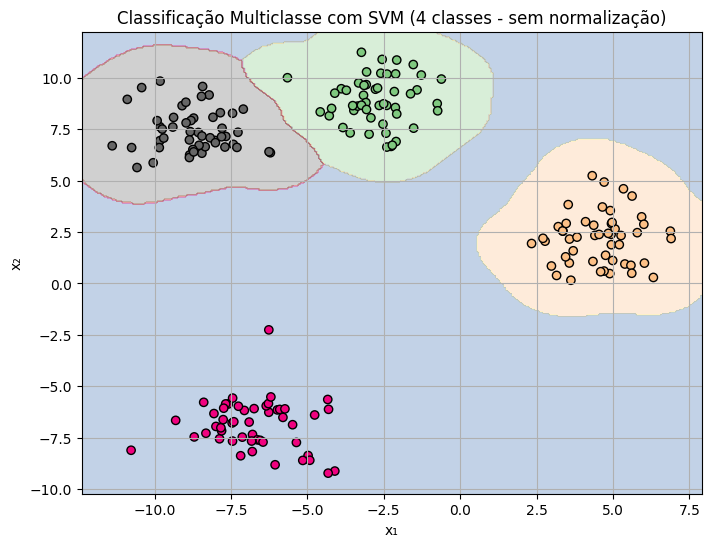

In [33]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

# Gerar dataset toy com 4 classes (sem normalização)
X_toy_raw, y_toy_raw = make_blobs(n_samples=200, centers=4, cluster_std=1.2, random_state=42)

# Treinar modelo multiclasse
modelo = treinar_svm_multiclasse(X_toy_raw, y_toy_raw, C=1.0, kernel_fn=rbf_kernel)

# Gerar grade de pontos
xx, yy = np.meshgrid(np.linspace(X_toy_raw[:, 0].min()-1, X_toy_raw[:, 0].max()+1, 300),
                     np.linspace(X_toy_raw[:, 1].min()-1, X_toy_raw[:, 1].max()+1, 300))
grid_points = np.c_[xx.ravel(), yy.ravel()]
Z = modelo(grid_points)
Z = Z.reshape(xx.shape)

# Visualizar
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='Accent')
plt.scatter(X_toy_raw[:, 0], X_toy_raw[:, 1], c=y_toy_raw, cmap='Accent', edgecolors='k')
plt.title("Classificação Multiclasse com SVM (4 classes - sem normalização)")
plt.xlabel("x₁")
plt.ylabel("x₂")
plt.grid(True)
plt.show()
